## Sliding Window Adaptive Histogram Equalization

In [26]:
path = 'C:\IITGN 2nd year\ES 204 Digital Systems\Local-Contrast-Enhancement-of-Image\Local Contrast Enhancement of Image\\105.jpg'
import matplotlib.image as Image
import numpy as np
import matplotlib.pyplot as plt

(150, 150)
[[ 71  78  85 ...  19  14   8]
 [ 95  93  99 ...  20  14   9]
 [102  97  97 ...  12   8   8]
 ...
 [ 28  29  30 ...  21  20  20]
 [ 27  28  29 ...  16  15  15]
 [ 27  28  29 ...  13  12  12]]


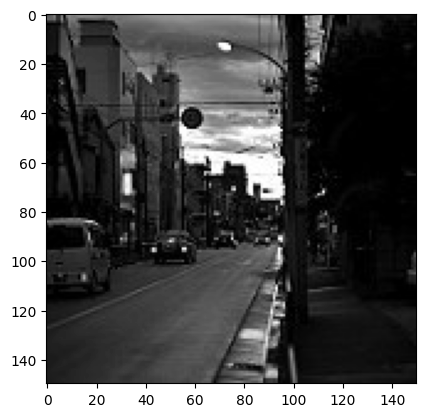

In [27]:
img= Image.imread(path)
#img = (img * 255).astype(np.uint8)
print (img.shape)
print(img)
plt.imshow(img, cmap='gray')

(194, 194)
[[60 61 61 ...  0  0  0]
 [59 59 60 ...  1  1  1]
 [57 58 59 ...  0  0  0]
 ...
 [44 43 43 ... 17 17 16]
 [46 45 45 ... 17 16 16]
 [46 45 44 ... 18 17 17]]
[[ 71  78  85 ...  19  14   8]
 [ 95 215 227 ... 213 190 163]
 [102 223 223 ... 179 158 157]
 ...
 [ 28  25  40 ... 217 212 211]
 [ 27  15  25 ... 147 120 119]
 [ 27  15  25 ...  71  49  49]]


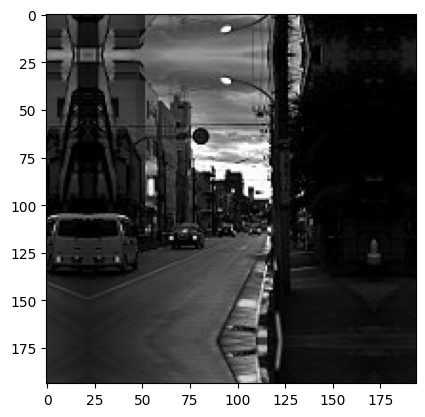

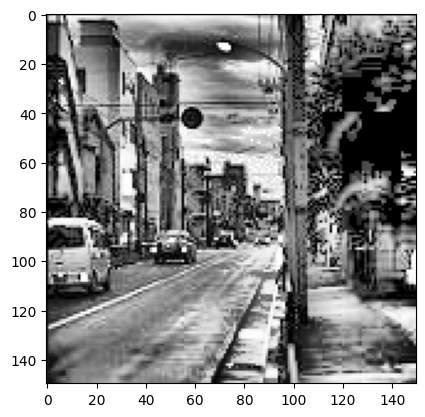

In [29]:
equalised_img = np.copy(img)
window_size = (45,45)
w= (window_size[0]-1)//2
clip_lim = 10

# Pad the image using mirroring
padded_img = np.pad(img, w, mode='symmetric')
print(padded_img.shape)
print(padded_img)

for i in range(1,img.shape[0]):
    for j in range(1,img.shape[1]):
        prev_window = padded_img[i-1:i-1+window_size[0], j:j+window_size[1]]
        window = padded_img[i:i+window_size[0], j:j+window_size[1]]
        w_1d = prev_window.flatten()
        
        hist_1=np.zeros(256)
        hist_2 = np.zeros(256)
        hist_3= np.zeros(256)
        for pix in w_1d:
            hist_1[pix]+=1
        for pix in prev_window[0]:
            hist_2[pix]+=1
        for pix in window[-1]:
            hist_3[pix]+=1

        hist = hist_1-hist_2+hist_3

        excess_pix = np.maximum(hist-clip_lim, 0) # no. of pixels above clip limit
        clipped_hist = hist - excess_pix  # subtracting the excess value
        excess_sum = np.sum(excess_pix)

        redistribute = excess_sum//256  # amount of excess sum redistributed to each pixel
        clipped_hist += redistribute

        pdf = hist

        cdf = np.zeros(256)
        cdf[0] = pdf[0]
        for k in range (1,256):
            cdf[k]=cdf[k-1]+pdf[k]
        
        cdf_normalised = (cdf - cdf[cdf>0].min())/(w_1d.size-cdf[cdf>0].min())
        histo_equal = np.round(cdf_normalised*255).astype(np.uint8)
        equalised_img[i, j] = histo_equal[window[w, w]]

print(equalised_img)
plt.imshow(padded_img, cmap='gray')
plt.show()
plt.imshow(equalised_img, cmap='gray')
